In [3]:
#Addressing EDA guidelines

#Optionally setting the working directory to the relevant folder

import os

os.chdir("/Users/EagleFace/Documents/Loan_Data")
os.getcwd()


'/Users/EagleFace/Documents/Loan_Data'

In [4]:
#2. Data import into dataframes.

import pandas as pd

Data_Dictionary = pd.read_excel("LCDataDictionary.xlsx") # data dictionary

Data_Dictionary.iloc[[40]]  # sample row of data dictionary

,LoanStatNew,Description
40,last_pymnt_d,Last month payment was received


In [5]:
Loan_Data = pd.read_csv("LoanStats3a.csv", skiprows = 1, low_memory = False)

Loan_Data.head(5)  # first 5 of the main matrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Denied_applications = pd.read_csv("/Users/EagleFace/Documents/Loan_Data/RejectStatsA.csv", skiprows=1, low_memory = False, )

Denied_applications.head(5)  # first 5 of the rejection matrix

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [7]:
#3. Data examination

print("Number of loans in loan data:", len(Loan_Data.index))
print("Number of columns in loan data:", len(Loan_Data.columns))

print("Number of loans in denied applications dataframe:", len(Denied_applications.index))
print("Number of columns in denied applications dataframe:", len(Denied_applications.columns))

#Given this shape of the 2 dataframes, we can start to break down 
#which columns need cleaning work. 
#We can start with the denied application matrix because it is smaller.

Number of loans in loan data: 42538
Number of columns in loan data: 145
Number of loans in denied applications dataframe: 755491
Number of columns in denied applications dataframe: 9


In [8]:
#Column names for main loan data frame
list(Loan_Data)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [9]:
#Columns for the denied application data
Denied_applications.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [10]:
df_column_pairs = {'Amount Requested':'loan_amnt',
                  'Application Date':'issue_d',
                  'Loan Title':'title',
                  'Risk_Score':'unknown / sub_grade could be closest correlate',
                  'Debt-To-Income Ratio':'dti',
                  'Zip Code':'zip_code',
                  'State':'addr_state',
                  'Employment Length':'emp_length',
                  'Policy Code':'policy_code'
                 }

In [11]:
type(Denied_applications['Employment Length'])

pandas.core.series.Series

In [12]:
D_Employment_Length = pd.DataFrame(Denied_applications['Employment Length'].value_counts())
D_Employment_Length.columns = ['# of applications']

In [13]:
labels = D_Employment_Length.index.values
values = D_Employment_Length.iloc[:,0]

In [14]:
print(labels)

['< 1 year' '10+ years' '2 years' '1 year' '3 years' '4 years' '5 years'
 '6 years' 'n/a' '7 years' '8 years' '9 years']


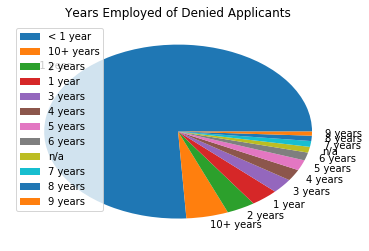

In [15]:
import matplotlib.pyplot as plt

chart = plt.pie(values, labels=labels)
plt.title("Years Employed of Denied Applicants")
plt.legend(labels)
plt.show()


In [16]:
#Trying to replicate this for the 'empl_length'

#type(Loan_Data['empl_length'])
type(Loan_Data.loc[:,'emp_length'])

pandas.core.series.Series

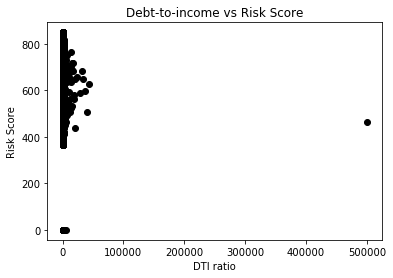

In [17]:
x = pd.Series(Denied_applications.loc[:,"Debt-To-Income Ratio"])
x = x.str.replace('%', '')
x = pd.to_numeric(x)
x = x / 100
y = pd.Series(Denied_applications.loc[:,"Risk_Score"])
plt.plot(x, y, 'o', color = 'black')
plt.title('Debt-to-income vs Risk Score')
plt.xlabel('DTI ratio')
plt.ylabel('Risk Score')
plt.show()

#print(x)

In [18]:
#For properly full EDA before the cleaning we need to figure out more about the variables. 
#adding variable types for the meta matrix. 

#Note in the effort of keeping it simple at focused on progress, there is no need at this point
#to go beyond the variables below in either matrix. The accepted loan database has many more 
#data points but these are not directly relatable to the matrix for denied-applications. 

df_column_pairs = {'Amount Requested':'loan_amnt',  #type = int
                  'Application Date':'issue_d',  #type = datetime64
                  'Loan Title':'title',  #type = string
                  'Risk_Score':'unknown : / sub_grade could be closest correlate',  #type = int
                  'Debt-To-Income Ratio':'dti',  #type = float
                  'Zip Code':'zip_code',  #delete column
                  'State':'addr_state',  #delete column
                  'Employment Length':'emp_length',  #type = float 
                  'Policy Code':'policy_code'  #type = integer, index
                 }

#One question we can ask is, can we use basic natural language processing (NLP) techniques
#to gain *any* predictive power from the string-name of the loan? Or is there a way to know 
#from the client's chosen loan title using NLP, or would it be too much 'noise' and should
#we just throw that column away as well? 

#It seems we have no directly categorical data, so hot one encoding wouldn't be applicable. 

#I balk at just throwing it away, because it's a matched column between the accepted vs 
#rejection question - what is the data science to the title of a loan in predicting outcome?

In [40]:
#To be clear this is the final set of columns we are going to use for the data. Really we have 
#6 factors going into the machine learning round. 

df_column_pairs = {'Amount Requested':'loan_amnt',  #type = int
                  'Application Date':'issue_d',  #type = datetime64
                  'Loan Title':'title',  #type = string
                  'Risk_Score':'dti?,  #type = int
                  'Debt-To-Income Ratio':'dti',  #type = float
                  'Employment Length':'emp_length',  #type = float 
                  'Policy Code':'policy_code'  #type = integer, index
                 }

x6 = pd.Series(Loan_Data.loc[:,"title"])
x6.head()


0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

In [20]:
y = pd.Series(Loan_Data.loc[:,"loan_amnt"])
y.head()


0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: loan_amnt, dtype: float64

In [31]:
#removing percent symbol and changing tens place
#for debt to income ratio
x = x.str.replace('%', '')
x = x.astype(float)
x = x/100

ValueError: could not convert string to float: '< 1 year'

In [23]:
x.head()

0     4 years
1    < 1 year
2      1 year
3    < 1 year
4    < 1 year
Name: Employment Length, dtype: object

In [24]:
x2 = pd.Series(Denied_applications.loc[:,"Application Date"])
x2.head()


0    2007-05-26
1    2007-05-26
2    2007-05-27
3    2007-05-27
4    2007-05-27
Name: Application Date, dtype: object

In [28]:
import numpy as np
import pandas as pd

x3 = pd.Series(Loan_Data.loc[:,"issue_d"])
x3[~x3.isnull()]
x3 = pd.DataFrame(x3.str.split("-", expand=True))
x3.columns = ['issue_month', 'issue_year']
#x3 = pd.to_datetime(x3.loc[:,0], format = '%b')
#type(x3)
x3.dropna()
print(x3)

#I am having trouble converting these dates to proper datetime format, 
#even though it was easier to do that for the other matrix.
#I am going to move on from this task for now and get other more 
#low hanging data wrangling fruit. 
#It's giving me an error due to having the NaN values, but my code
#to remove the NaN's is not working. 

      issue_month issue_year
0             Dec       2011
1             Dec       2011
2             Dec       2011
3             Dec       2011
4             Dec       2011
5             Dec       2011
6             Dec       2011
7             Dec       2011
8             Dec       2011
9             Dec       2011
10            Dec       2011
11            Dec       2011
12            Dec       2011
13            Dec       2011
14            Dec       2011
15            Dec       2011
16            Dec       2011
17            Dec       2011
18            Dec       2011
19            Dec       2011
20            Dec       2011
21            Dec       2011
22            Dec       2011
23            Dec       2011
24            Dec       2011
25            Dec       2011
26            Dec       2011
27            Dec       2011
28            Dec       2011
29            Dec       2011
...           ...        ...
42508         Jul       2007
42509         Jul       2007
42510         

In [30]:
x4 = pd.Series(Denied_applications.loc[:,"Employment Length"])
#x4.dropna()
x4 = []
print(x4)

#This data needs to be sorted into (semi) weighted categories
#My goal is to map NaNs to 0, <1 to 0.5 and so on up to 10+ can be weighted at 11

0           4 years
1          < 1 year
2            1 year
3          < 1 year
4          < 1 year
5           3 years
6          < 1 year
7           2 years
8           4 years
9           4 years
10        10+ years
11           1 year
12         < 1 year
13          3 years
14         < 1 year
15         < 1 year
16          3 years
17          3 years
18         < 1 year
19         < 1 year
20         < 1 year
21           1 year
22          2 years
23          2 years
24          2 years
25         < 1 year
26         < 1 year
27         < 1 year
28         < 1 year
29         < 1 year
            ...    
755461     < 1 year
755462     < 1 year
755463     < 1 year
755464     < 1 year
755465     < 1 year
755466     < 1 year
755467     < 1 year
755468     < 1 year
755469     < 1 year
755470     < 1 year
755471     < 1 year
755472     < 1 year
755473     < 1 year
755474     < 1 year
755475     < 1 year
755476     < 1 year
755477     < 1 year
755478     < 1 year
755479     < 1 year


In [38]:
print(x5[4514])

other


In [42]:
print(x6[999])

Credit Cards are Demons
